In [1]:
import pynr as nr
import matplotlib.pyplot as plt

Show the metadata keys of each NR code

In [2]:
nr.nr_metadata_keys('RIT',nr_type='BBH')

dict_keys(['catalog-tag', 'resolution-tag', 'id-tag', 'run-name', 'data-type', 'system-type', 'comments', 'authors-emails', 'simulation-bibtex-keys', 'code-bibtex-keys', 'initial-data-bibtex-keys', 'quasicircular-bibtex-keys', 'eccentricity-bibtex-keys', 'extrapolation-bibtex-keys', 'code', 'evolution-system', 'evolution-gauge', 'cfl', 'fd-order', 'dissipation-order', 'eccentricity-measurement-method', 'eccentricity', 'freq-start-22', 'freq-start-22-Hz-1Msun', 'number-of-cycles-22', 'number-of-orbits', 'initial-data-type', 'initial-ADM-energy', 'initial-orbital-angular-momentum', 'initial-ADM-angular-momentum-x', 'initial-ADM-angular-momentum-y', 'initial-ADM-angular-momentum-z', 'initial-separation', 'initial-mass1', 'initial-mass2', 'initial-total-mass', 'initial-bh-chi1z', 'initial-bh-chi2z', 'relaxed-time', 'relaxed-mass1', 'relaxed-mass2', 'relaxed-total-mass', 'relaxed-mass-ratio-1-over-2', 'relaxed-LNhatx', 'relaxed-LNhaty', 'relaxed-LNhatz', 'relaxed-nhatx', 'relaxed-nhaty', 'r

In [3]:
nr.nr_metadata_keys('SXS',nr_type='BBH')

dict_keys(['url', 'simulation_name', 'alternative_names', 'initial_data_type', 'object_types', 'number_of_orbits', 'reference_mass_ratio', 'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp', 'reference_eccentricity', 'reference_dimensionless_spin1', 'reference_dimensionless_spin2', 'reference_orbital_frequency', 'reference_mass1', 'reference_mass2', 'reference_time', 'reference_position1', 'reference_position2', 'reference_mean_anomaly', 'keywords', 'point_of_contact_email', 'authors_emails', 'simulation_bibtex_keys', 'code_bibtex_keys', 'initial_data_bibtex_keys', 'quasicircular_bibtex_keys', 'initial_separation', 'initial_orbital_frequency', 'initial_adot', 'object1', 'object2', 'initial_ADM_energy', 'initial_ADM_linear_momentum', 'initial_ADM_angular_momentum', 'initial_mass1', 'initial_mass2', 'initial_dimensionless_spin1', 'initial_dimensionless_spin2', 'initial_position1', 'initial_position2', 'relaxation_time', 'common_horizon_time', 'remnant_mass', 'remnant_dimen

In [4]:
nr.nr_metadata_keys('MAYA',nr_type='BBH')

dict_keys(['GTID', 'GT_Tag', 'q', 'a1x', 'a1y', 'a1z', 'a2x', 'a2y', 'a2z', 'af', 'mf', 'Momega'])

In [5]:
maya_conditions=['BBH',['q',[2,4]],['af',[0.7,0.9]]]
maya_selection=nr.nr_catalogue_select(maya_conditions,code='MAYA',verbose=True)

            Tag      q       af
0   GT:BBH:0428  2.00   0.8095 
1   GT:BBH:0430  4.00   0.7794 
2   GT:BBH:0432  4.00   0.7585 
3   GT:BBH:0458  2.00   0.7223 
4   GT:BBH:0459  2.50   0.7151 
5   GT:BBH:0460  2.00   0.8045 
6   GT:BBH:0461  2.00   0.7766 
7   GT:BBH:0465  2.50   0.7875 
8   GT:BBH:0466  2.50   0.7563 
9   GT:BBH:0468  4.00   0.7485 
10  GT:BBH:0469  4.00   0.7148 
11  GT:BBH:0472  2.00   0.7697 
12  GT:BBH:0480  2.50   0.7312 
13  GT:BBH:0578  4.00   0.7784 
14  GT:BBH:0587  2.00   0.7175 
15  GT:BBH:0588  2.00   0.8387 
16  GT:BBH:0596  3.00   0.7126 
17  GT:BBH:0600  3.00   0.7957 
18  GT:BBH:0603  3.00   0.7552 
19  GT:BBH:0607  3.00   0.7176 
20  GT:BBH:0613  3.00   0.7178 
21  GT:BBH:0626  3.00   0.7189 
22  GT:BBH:0628  2.50   0.7499 
23  GT:BBH:0630  2.50   0.7762 
24  GT:BBH:0645  2.50   0.7241 
25  GT:BBH:0646  2.50   0.7585 
26  GT:BBH:0647  2.50   0.8047 
27  GT:BBH:0648  2.50   0.7970 
28  GT:BBH:0649  2.50   0.7833 
29  GT:BBH:0666  2.50   0.7947 
30  GT:B

Select the NR according to a certain parameter range 

In [6]:
sxs_conditions=['BBH',['reference_mass_ratio',[2,4]],['remnant_dimensionless_spin',[0.7,0.9]],['reference_chi_eff',[0.2,0.4]]]
sxs_selection=nr.nr_catalogue_select(sxs_conditions,code='SXS',verbose=True)

             Tag  reference_mass_ratio                         remnant_dimensionless_spin  reference_chi_eff
0   SXS:BBH:0031              3.001326  [-1.72916805313e-08, -8.27039434208e-09, 0.755...           0.374702
1   SXS:BBH:0033              3.001262  [0.0925073095404, 0.00694581930202, 0.73287879...           0.324111
2   SXS:BBH:0041              3.001324  [-1.11137733299e-07, 6.61033598023e-08, 0.7550...           0.374693
3   SXS:BBH:0043              3.001285  [0.110356204651, 0.00625487601903, 0.731014823...           0.324302
4   SXS:BBH:0045              2.999804  [-1.5831243272e-08, -2.26826286557e-08, 0.7410...           0.249803
5   SXS:BBH:0048              2.999806  [0.0230026946098, -0.00238207171617, 0.7550623...           0.374590
6   SXS:BBH:0051              2.999804  [-0.0230150191869, 0.00242102062741, 0.7550582...           0.374582
7   SXS:BBH:0104              2.999804  [-0.0229698791899, 0.00234673671278, 0.7551151...           0.374582
8   SXS:BBH:0174   

In [7]:
sxs_conditions=['BBH',['reference_chi1_perp',[-0.01,0.01]],['reference_chi2_perp',[-0.01,0.01]],['remnant_dimensionless_spin',[0.0,0.1]]]
sxs_selection=nr.nr_catalogue_select(sxs_conditions,code='SXS',verbose=True)
sxs_selection

             Tag  reference_chi1_perp  reference_chi2_perp                         remnant_dimensionless_spin
0   SXS:BBH:0064         3.743147e-10         8.642558e-11  [1.38437092498e-09, -4.9255865163e-12, -0.0525...
1   SXS:BBH:0114         4.028679e-10         1.090992e-10  [3.22745247054e-10, -1.42670847728e-11, -0.052...
2   SXS:BBH:0205         2.656490e-08         3.062134e-08  [6.33839858379e-09, 8.78261825043e-09, 0.06195...
3   SXS:BBH:0206         3.595922e-08         9.447003e-08  [-3.80573576242e-09, 3.81556999895e-09, 0.0619...
4   SXS:BBH:0207         3.167250e-08         8.479361e-08  [1.55007162551e-08, 2.39003537657e-08, -0.0769...
5   SXS:BBH:1424         1.115195e-06         7.501760e-07  [-3.89777098199e-07, 1.1446428032e-06, -0.0929...
6   SXS:BBH:1448         5.645183e-07         2.155850e-07  [2.7824532688e-08, -6.22176165943e-07, 0.01251...
7   SXS:BBH:1449         4.637581e-07         1.128086e-07  [1.87467373248e-07, 1.53701244545e-07, 0.01049...
8   SXS:BB

['SXS:BBH:0064',
 'SXS:BBH:0114',
 'SXS:BBH:0205',
 'SXS:BBH:0206',
 'SXS:BBH:0207',
 'SXS:BBH:1424',
 'SXS:BBH:1448',
 'SXS:BBH:1449',
 'SXS:BBH:1455',
 'SXS:BBH:1931',
 'SXS:BBH:1932',
 'SXS:BBH:1936',
 'SXS:BBH:2018',
 'SXS:BBH:2040']

In [8]:
rit_conditions=['BBH',['relaxed-mass-ratio-1-over-2',[0.3,1]],['final-chi',[0,1]],['eccentricity',[0,0.5]]]
rit_selection=nr.nr_catalogue_select(rit_conditions,code='RIT',verbose=True)

              Tag relaxed-mass-ratio-1-over-2     final-chi  eccentricity
0    RIT:BBH:0348           0.600021233110695  0.5136755163  0.0014409817
1    RIT:BBH:0949           0.999994234533009  0.7311311487  0.0009138657
2    RIT:BBH:0827            0.59980006990024  0.6861153537  0.0020615387
3    RIT:BBH:0402           0.600096215759514  0.8526335314  0.0009536762
4    RIT:BBH:0036           0.500108708314353  0.9027193189  0.0021756908
..            ...                         ...           ...           ...
766  RIT:BBH:0893           0.924819535519753  0.8402056334  0.0012358844
767  RIT:BBH:0304            0.66676002292701  0.5492698211  0.0013724038
768  RIT:BBH:0520           0.818549674547101  0.6315784761  0.0018406786
769  RIT:BBH:1001           0.550012191507429  0.3354938879  0.0015005994
770  RIT:BBH:0292           0.666724283089485  0.9063062691  0.0012393530

[771 rows x 4 columns]


In [9]:
nr.nr_waveform?

Signature:
nr.nr_waveform(
    download_Q=True,
    root_folder=None,
    pycbc_format=True,
    modes=[[2, 2], [2, -2]],
    distance=100,
    inclination=0,
    coa_phase=0,
    modes_combined=True,
    tapering=True,
    RD=False,
    zero_align=True,
    extrapolation_order=2,
    resolution_level=-1,
    NRUnits=False,
    **args,
)
Docstring:
Function to load the waveforms from the NR catalogues. 

    Parameters
----------
code: {'SXS','RIT','MAYA'}. Select the catalogue you want the data from.
tag: eg. {'SXS:BBH:0305','RIT-BBH-0001','GT0001'}. Tag of the target waveform.
download_Q: logical, optional, Default = True. If True downloads the data from the catalogue url.
root_folder: string, optional, Default = None. If download_Q = False, it must be provided.
pycbc_format: logical, optional, Default=True. If True it provides hp, hc in the Timeseries format.

mass: Total mass in solar masses. 
modes: list of modes, optional, Default= [[2,2],[2,-2]].
distance: Distance, optional, De

## Load the data from a online repositories

In [15]:
hp_rit,hx_rit= nr.nr_waveform(code='RIT',
                              pycbc_format=True,
    root_folder='/work/francisco.jimenez/RIT/Data',
    download_Q = True,
    tag = 'RIT:BBH:0001',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True)

Extracting and combining modes


In [21]:
hp_sxs,hx_sxs= nr.nr_waveform(code='SXS',pycbc_format=True,
    download_Q = True,
    tag = 'SXS:BBH:0305',
    root_folder='/work/francisco.jimenez/SXS/data',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


In [22]:
hp_maya,hx_maya= nr.nr_waveform(code='MAYA',pycbc_format=True,
    download_Q = True,
    tag = 'GT0229',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


Plot the data

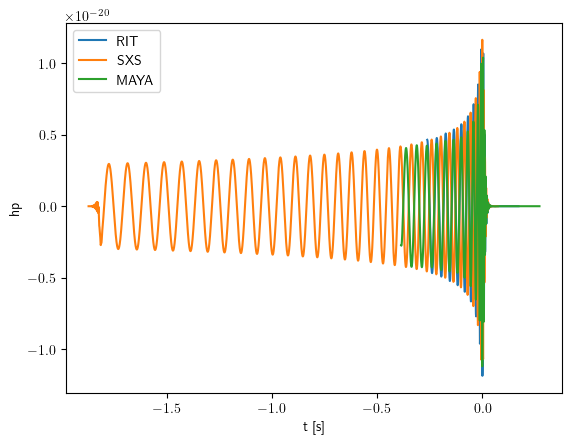

In [23]:
plt.plot(hp_rit.sample_times,hp_rit,label='RIT')
plt.plot(hp_sxs.sample_times,hp_sxs,label='SXS')
plt.plot(hp_maya.sample_times,hp_maya,label='MAYA')

plt.xlabel('t [s]')
plt.ylabel('hp')
plt.legend()
plt.show()

## Load the data from a local repository

In [10]:
hp_sxs,hx_sxs= nr.nr_waveform(code='SXS',pycbc_format=True,
    download_Q = False,
    root_folder='/work/francisco.jimenez/SXS/data',
    tag = 'SXS:BBH:0305',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


In [11]:
hp_rit,hx_rit= nr.nr_waveform(code='RIT',
                              pycbc_format=True,
    root_folder='/work/francisco.jimenez/RIT/Data',
    download_Q = False,
    tag = 'RIT:BBH:0001',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True)

Extracting and combining modes


In [12]:
hp_maya,hx_maya= nr.nr_waveform(code='MAYA',pycbc_format=True,
    download_Q = False,
    root_folder='/work/francisco.jimenez/Georgia/gt-waveform-catalog/h5files',
    tag = 'GT0229',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


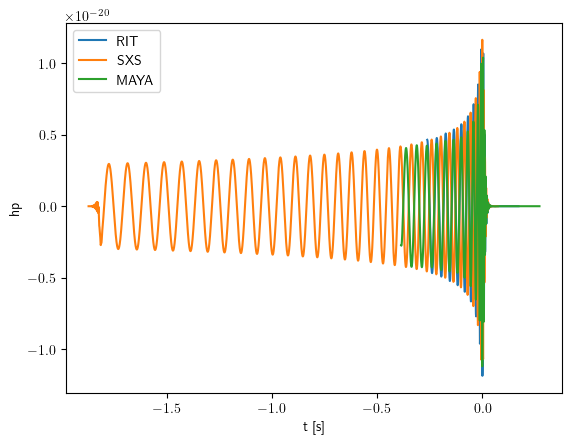

In [16]:
plt.plot(hp_rit.sample_times,hp_rit,label='RIT')
plt.plot(hp_sxs.sample_times,hp_sxs,label='SXS')
plt.plot(hp_maya.sample_times,hp_maya,label='MAYA')

plt.xlabel('t [s]')
plt.ylabel('hp')
plt.legend()
plt.show()

## Integrate it into pycbc as a waveform approximant

In [19]:
import pycbc.waveform
pycbc.waveform.add_custom_waveform('nr_waveform', nr.nr_waveform, 'time', force=True)

In [22]:
hp_maya,hx_maya= pycbc.waveform.get_td_waveform(approximant='nr_waveform',
                               f_lower = 20,
                               code='MAYA',pycbc_format=True,
                               download_Q = False,
                               root_folder='/work/francisco.jimenez/Georgia/gt-waveform-catalog/h5files',
                               tag = 'GT0229',
                               modes  = [[2,2],[2,-2]],
                               mass  = 100,
                               distance  = 100,
                               inclination = 0,
                               coa_phase = 0,
                               modes_combined = True,
                               delta_t = 1/2048,
                               tapering = False,
                               RD = False,
                               zero_align = True)

Extracting and combining modes


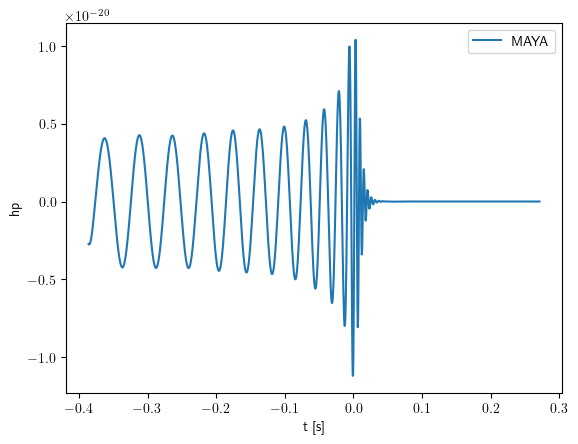

In [23]:
plt.plot(hp_maya.sample_times,hp_maya,label='MAYA')

plt.xlabel('t [s]')
plt.ylabel('hp')
plt.legend()
plt.show()

## Take the Fourier transform

In [25]:
hp_maya_f,hx_maya_f=hp_maya.to_frequencyseries(),hx_maya.to_frequencyseries()
hp_rit_f,hx_rit_f=hp_rit.to_frequencyseries(),hx_rit.to_frequencyseries()
hp_sxs_f,hx_sxs_f=hp_sxs.to_frequencyseries(),hx_sxs.to_frequencyseries()

/work/francisco.jimenez/venv_nr_search/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


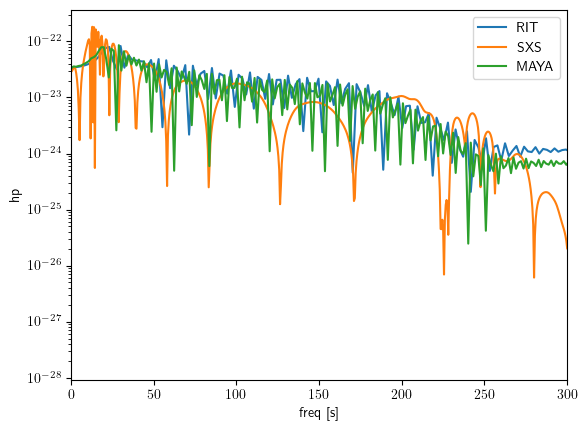

In [26]:
import numpy as np
plt.plot(hp_rit_f.sample_frequencies,np.sqrt(hp_rit_f**2+hx_rit_f**2),label='RIT')
plt.plot(hp_sxs_f.sample_frequencies,np.sqrt(hp_sxs_f**2+hx_sxs_f**2),label='SXS')
plt.plot(hp_maya_f.sample_frequencies,np.sqrt(hp_maya_f**2+hx_maya_f**2),label='MAYA')

plt.xlabel('freq [s]')
plt.xlim(0,300)
plt.yscale('log')
plt.ylabel('hp')
plt.legend()
plt.show()

In [56]:
import numpy as np
#checking precessing

sxs_conditions=['BBH',['reference_chi2_perp',[0.7,0.8]]]
sxs_selection=nr.nr_catalogue_select(sxs_conditions,code='SXS',verbose=False)
sxs_metadata=nr.nr_catalogue_metadata(sxs_selection,verbose=False,code='SXS');

sxs_massratio_spin=np.array([np.array([i['alternative_names'][-1] if len(i['alternative_names'])==2 else i['alternative_names'],
                              float(i['reference_mass_ratio']),float(i['reference_chi1_perp']),
                              float(i['reference_chi2_perp'])]) for i in sxs_metadata],dtype='object')
# delete troublesome cases

In [57]:
sxs_massratio_spin_sorted=sorted(sxs_massratio_spin, key=lambda tup: tup[-1], reverse=True)
tag=sxs_massratio_spin_sorted[0][0]

In [58]:
h22,h2m2= nr.nr_waveform(code='SXS',pycbc_format=False,
    download_Q = False,
    NRUnits = True,
    root_folder= '/work/francisco.jimenez/SXS/data' ,
    tag = tag,
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = False,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

In [59]:
sxs_massratio_spin_sorted[0][-1]

'0.7999961653258443'

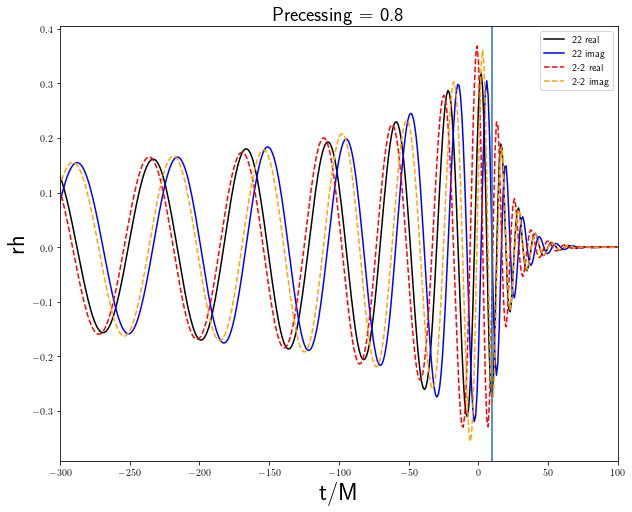

In [60]:
plt.figure(figsize=(10., 8.))
plt.plot(h22[:,0],h22[:,1].real,color='black',label='22 real')
plt.plot(h22[:,0],h22[:,1].imag,color='blue',label='22 imag')

plt.plot(h2m2[:,0],(np.conjugate(h2m2[:,1])).real,color='red',linestyle='dashed',label='2-2 real')
plt.plot(h2m2[:,0],(np.conjugate(h2m2[:,1])).imag,color='orange',linestyle='dashed',label='2-2 imag')
plt.xlim(-300,100)
plt.title("Precessing = "+str(round(float(sxs_massratio_spin_sorted[0][-1]),ndigits=2)),fontsize=20)

plt.legend()
plt.xlabel('t/M',fontsize=24)
plt.ylabel('rh',fontsize=24)
plt.axvline(10)
plt.show()

In [88]:
# checking non precessing

In [61]:
h22np,h2m2np= nr.nr_waveform(code='SXS',pycbc_format=False,
    download_Q = False,
    NRUnits = True,
    root_folder= '/work/francisco.jimenez/SXS/data' ,
    tag = 'SXS:BBH:0305',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = False,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

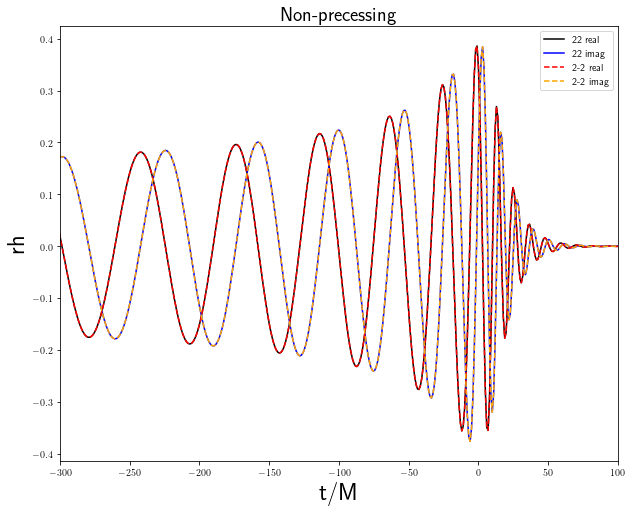

In [62]:
plt.figure(figsize=(10., 8.))
plt.plot(h22np[:,0],h22np[:,1].real,color='black',label='22 real')
plt.plot(h22np[:,0],h22np[:,1].imag,color='blue',label='22 imag')

plt.plot(h2m2np[:,0],(np.conjugate(h2m2np[:,1])).real,color='red',linestyle='dashed',label='2-2 real')
plt.plot(h2m2np[:,0],(np.conjugate(h2m2np[:,1])).imag,color='orange',linestyle='dashed',label='2-2 imag')
plt.title("Non-precessing",fontsize=20)
plt.xlabel('t/M',fontsize=24)
plt.ylabel('rh',fontsize=24)

plt.xlim(-300,100)
plt.legend()
plt.show()

In [63]:
import numpy as np
#checking precessing

sxs_conditions=['BBH',['reference_eccentricity',[0.1,0.8]]]
sxs_selection=nr.nr_catalogue_select(sxs_conditions,code='SXS',verbose=False)
sxs_metadata=nr.nr_catalogue_metadata(sxs_selection,verbose=False,code='SXS');

sxs_massratio_spin=np.array([np.array([i['alternative_names'][-1] if len(i['alternative_names'])==2 else i['alternative_names'],
                              float(i['reference_mass_ratio']),float(i['reference_eccentricity'])]) for i in sxs_metadata],dtype='object')
# delete troublesome cases

In [64]:
sxs_massratio_spin_sorted=sorted(sxs_massratio_spin, key=lambda tup: tup[-1], reverse=True)
tag=sxs_massratio_spin_sorted[0][0]

In [65]:
h22,h2m2= nr.nr_waveform(code='SXS',pycbc_format=False,
    download_Q = False,
    NRUnits = True,
    root_folder= '/work/francisco.jimenez/SXS/data',
    tag = tag,
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = False,
    delta_t = 1/2048,
    tapering = False,
    RD = False,
    zero_align = True )

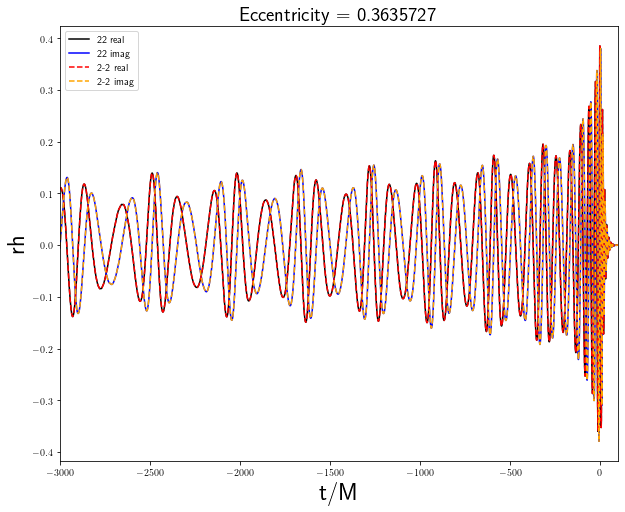

In [66]:
plt.figure(figsize=(10., 8.))
plt.plot(h22[:,0],h22[:,1].real,color='black',label='22 real')
plt.plot(h22[:,0],h22[:,1].imag,color='blue',label='22 imag')

plt.plot(h2m2[:,0],(np.conjugate(h2m2[:,1])).real,color='red',linestyle='dashed',label='2-2 real')
plt.plot(h2m2[:,0],(np.conjugate(h2m2[:,1])).imag,color='orange',linestyle='dashed',label='2-2 imag')

plt.title("Eccentricity = "+str(sxs_massratio_spin_sorted[0][-1]),fontsize=20)
plt.xlabel('t/M',fontsize=24)
plt.ylabel('rh',fontsize=24)
plt.xlim(-3000,100)
plt.legend()
plt.show()